# Event Stat

In [161]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

In [162]:
df1 = pd.read_csv('BTC_spotPrice_2021_1.csv', index_col='Datetime', parse_dates=True)
df2 = pd.read_csv('BTC_spotPrice_2021_2.csv', index_col='Datetime', parse_dates=True)
df3 = pd.read_csv('BTC_spotPrice_2022_1.csv', index_col='Datetime', parse_dates=True)
df4 = pd.read_csv('BTC_spotPrice_2022_2.csv', index_col='Datetime', parse_dates=True)
df = pd.concat([df1,df2,df3,df4])

df.index = [i+dt.timedelta(minutes=1) for i in df.index]

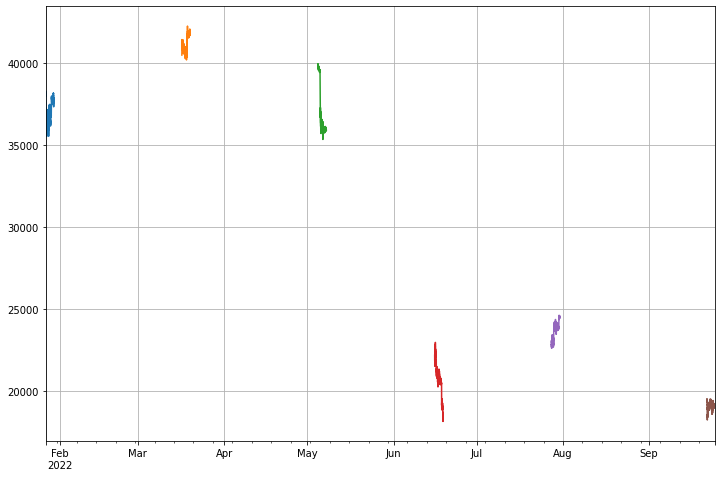

In [163]:
df.loc['2022-1-26 19:24:18':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-3-16 19:23:20':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-5-4 19:16:23':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-6-15 19:25:18':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-7-27 19:23:19':, 'Close'].iloc[:1440*3].plot()
df.loc['2022-9-21 19:11:38':, 'Close'].iloc[:1440*3].plot(figsize=(12,8), grid=True);

In [9]:
def event_stat(df=df, eventTime='2022-5-4 19:16', frontMinute=2880, backMinute=2880, kbar=5, print_=False, plot_=False):

    frontLength  = int(frontMinute / kbar)
    backLength = int(backMinute / kbar)

    d1 = df.resample(rule=str(kbar)+'T', closed='left', label='left').first()[['Open']]
    d2 = df.resample(rule=str(kbar)+'T', closed='left', label='left').max()[['High']]
    d3 = df.resample(rule=str(kbar)+'T', closed='left', label='left').min()[['Low']]
    d4 = df.resample(rule=str(kbar)+'T', closed='left', label='left').last()[['Close']]
    d5 = df.resample(rule=str(kbar)+'T', closed='left', label='left').sum()[['Volume']]
    df_ = pd.concat([d1,d2,d3,d4,d5], axis=1)

    df_['Return'] = df['Close'].pct_change().fillna(0)

    front_df = df_.loc[:eventTime].iloc[-frontLength:]
    back_df = df_.loc[eventTime:].iloc[:backLength]

    # front stat
    mean1 = front_df['Return'].mean()
    std1 = front_df['Return'].std()
    skew1 = front_df['Return'].skew()
    kurt1 = front_df['Return'].kurt()
    rsi1 = talib.RSI(front_df['Close'], frontLength-1).iloc[-1]
    adx1 = talib.ADX(front_df['High'], front_df['Low'], front_df['Close'], frontLength/2-1).iloc[-1]
    atr1 = talib.ATR(front_df['High'], front_df['Low'], front_df['Close'], frontLength-1).iloc[-1]

    # back stat
    mean2 = back_df['Return'].mean()
    std2 = back_df['Return'].std()
    skew2 = back_df['Return'].skew()
    kurt2 = back_df['Return'].kurt()
    rsi2 = talib.RSI(back_df['Close'], backLength-1).iloc[-1]
    adx2 = talib.ADX(back_df['High'], back_df['Low'], back_df['Close'], backLength/2-1).iloc[-1]
    atr2 = talib.ATR(back_df['High'], back_df['Low'], back_df['Close'], backLength-1).iloc[-1]

    if print_ == True:
        print('[before event]')
        print(f'mean: {mean1}')
        print(f'std: {std1}')
        print(f'skew: {skew1}')
        print(f'kurt: {kurt1}')
        print(f'rsi: {rsi1}')
        print(f'adx: {adx1}')
        print(f'atr: {atr1}')

        print('\n[after event]')
        print(f'mean: {mean2}')
        print(f'std: {std2}')
        print(f'skew: {skew2}')
        print(f'kurt: {kurt2}')
        print(f'rsi: {rsi2}')
        print(f'adx: {adx2}')
        print(f'atr: {atr2}')

    if plot_ == True:
        front_df['Close'].plot(title='before event', figsize=(8,4))
        plt.show()

        back_df['Close'].plot(title='after event', figsize=(8,4))
        plt.show()

        front_df['Return'].plot(kind='hist', bins=30, alpha = 0.8, color='black', figsize=(8, 4), legend=True, label='frontEvent')
        back_df['Return'].plot(kind='hist', bins=30, alpha = 0.6, color='orange', figsize=(8, 4), legend=True, label='backEvent', title='Return Histogram')
        plt.show()

    result = [[mean1, std1, skew1, kurt1, rsi1, adx1, atr1], [mean2, std2, skew2, kurt2, rsi2, adx2, atr2]]

    return result

[before event]
mean: 7.300968334068847e-05
std: 0.0012850763763219153
skew: -1.2305164047827453
kurt: 14.647985280731033
rsi: 55.424623636558344
adx: 23.64364467638003
atr: 254.97884816753938

[after event]
mean: -0.00011041953402881587
std: 0.0009616909907340552
skew: 0.28257696691611073
kurt: 1.993357110447191
rsi: 47.546411798388384
adx: 10.684000245863817
atr: 244.1161780104711


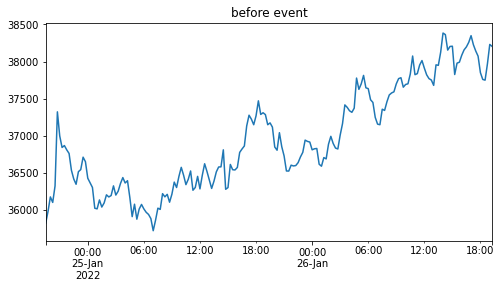

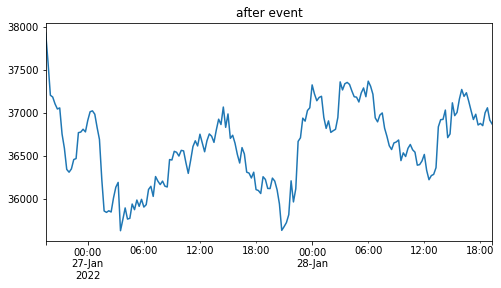

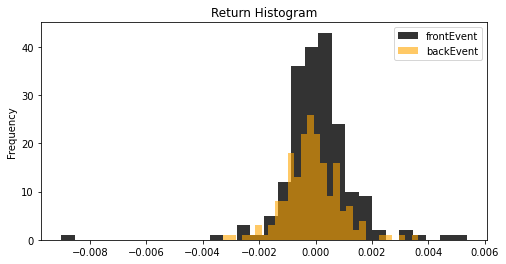

[before event]
mean: 6.51732522984379e-05
std: 0.0008325473163180056
skew: 0.05203614973582181
kurt: 2.562550228697019
rsi: 54.65025825066303
adx: 12.137949369424927
atr: 246.12659685863852

[after event]
mean: 8.992044589180986e-05
std: 0.0005964842348403119
skew: 0.21905684490331842
kurt: 1.2722701030135215
rsi: 53.459758453244056
adx: 6.341312923350487
atr: 161.29062827225144


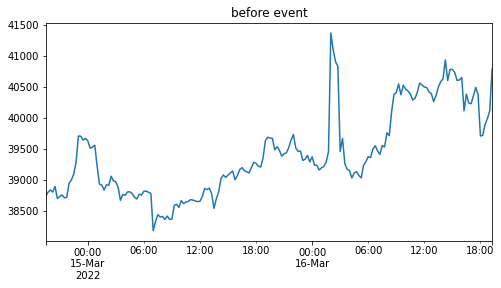

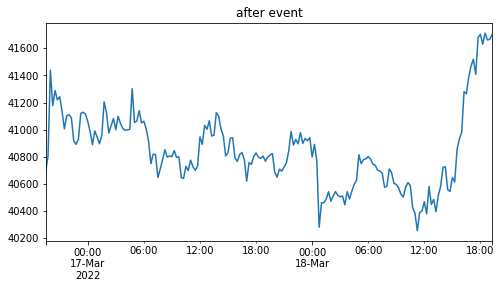

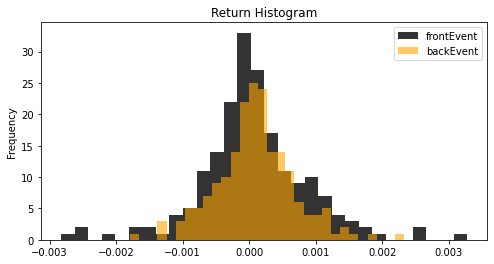

[before event]
mean: -1.7859551594214446e-05
std: 0.0006470182006163399
skew: 2.0106448911940102
kurt: 12.33801765066017
rsi: 56.170835883903216
adx: 13.121415206090926
atr: 137.017329842932

[after event]
mean: -5.228959376295597e-05
std: 0.0008018796988947589
skew: 0.8936643646009712
kurt: 8.415743668172464
rsi: 38.06026521034258
adx: 42.48222040521236
atr: 174.97193717277503


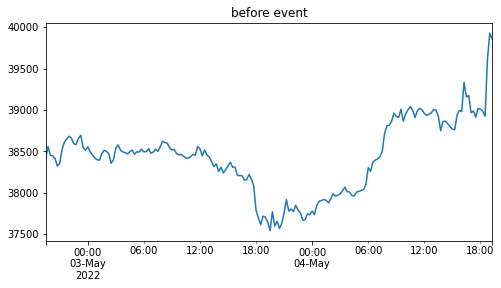

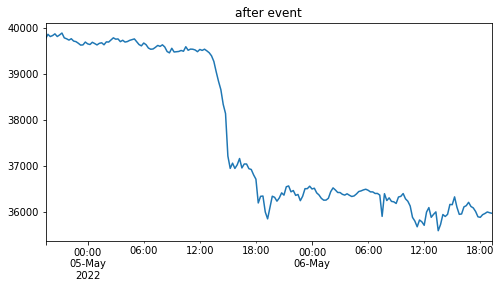

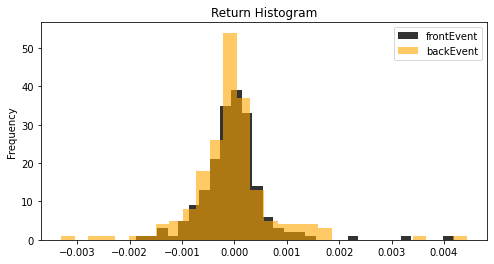

[before event]
mean: 0.00015521428771765196
std: 0.002063565323380806
skew: 1.3868907942388502
kurt: 4.806816245345203
rsi: 47.60944757801293
adx: 4.79805710853268
atr: 311.41785340314135

[after event]
mean: 7.573762422400168e-05
std: 0.0013660725960272968
skew: -0.34528559626893995
kurt: 2.2593373980460147
rsi: 46.279608672198655
adx: 6.585965695421706
atr: 189.63837696335074


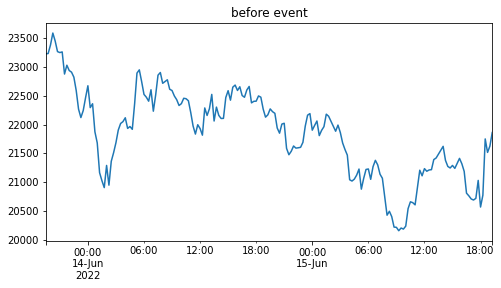

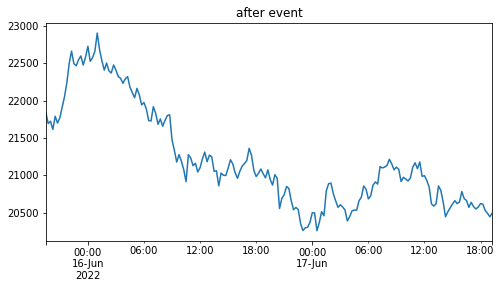

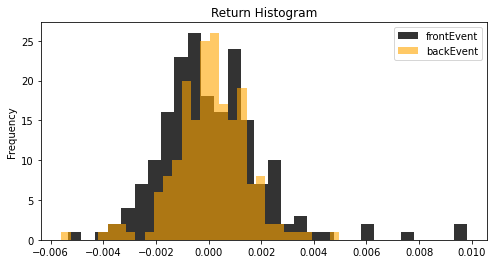

[before event]
mean: 1.3168435473860998e-05
std: 0.0008760592483887817
skew: 0.9422991185150369
kurt: 6.160638530046981
rsi: 56.401208782370084
adx: 7.5547774259549705
atr: 109.20198952879598

[after event]
mean: 2.789766628170931e-05
std: 0.0010327468424609584
skew: -0.2108350483902223
kurt: 3.0139844257273105
rsi: 54.18966124227775
adx: 18.37003858295236
atr: 142.22476439790609


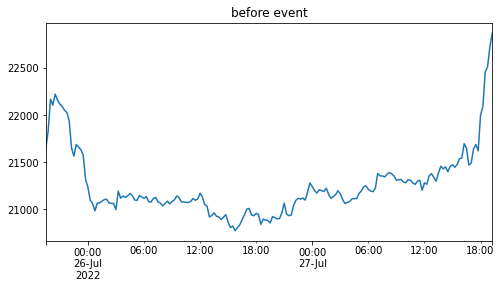

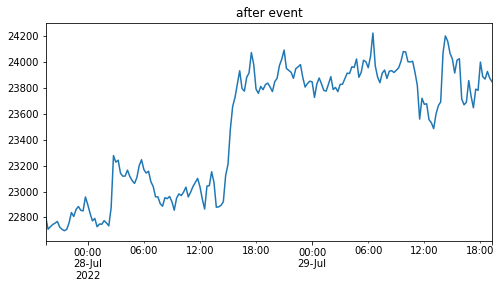

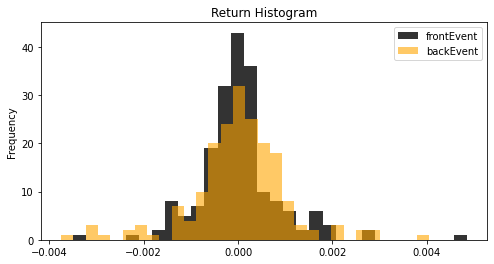

[before event]
mean: 0.00011643090728283637
std: 0.0017539451805299367
skew: 9.387315864875342
kurt: 113.32859736032738
rsi: 50.414001793481056
adx: 6.479925769731219
atr: 110.14476439790562

[after event]
mean: -3.551343349727775e-05
std: 0.0008895317554484769
skew: -0.1610143417310597
kurt: 1.8812137438082908
rsi: 46.90743755822511
adx: 6.635581691678728
atr: 109.15183246073323


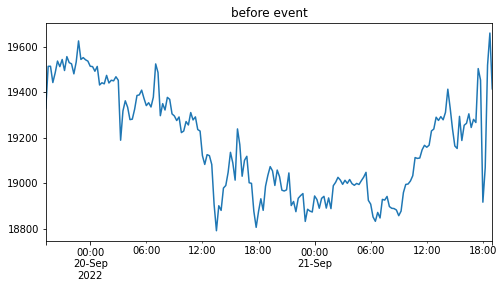

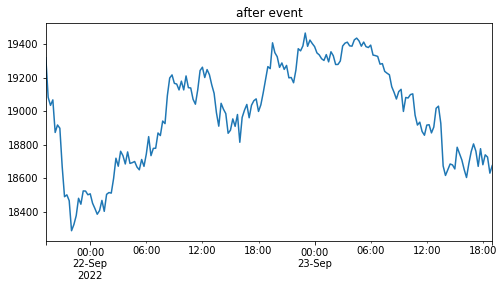

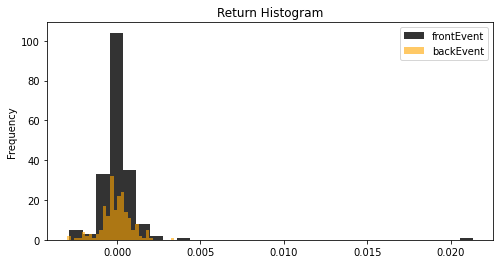

In [10]:
for t in ['2022-1-26 19:24', '2022-3-16 19:23', '2022-5-4 19:16', '2022-6-15 19:25', '2022-7-27 19:23', '2022-9-21 19:11']:
    stat = event_stat(df=df, eventTime=t, frontMinute=2880, backMinute=2880, kbar=15, print_=True, plot_=True)

In [11]:
stat

[[0.00011643090728283637,
  0.0017539451805299367,
  9.387315864875342,
  113.32859736032738,
  50.414001793481056,
  6.479925769731219,
  110.14476439790562],
 [-3.551343349727775e-05,
  0.0008895317554484769,
  -0.1610143417310597,
  1.8812137438082908,
  46.90743755822511,
  6.635581691678728,
  109.15183246073323]]

[before event]
mean: -1.7062501182067585e-05
std: 0.0024057965341136374
skew: 0.638956612896362
kurt: 5.538131181528119
rsi: 49.396425044063164
adx: 2.192594273696306
atr: 73.55509204584952

[after event]
mean: -2.036811634151336e-05
std: 0.0015464168434403043
skew: 0.325756037829319
kurt: 2.7930138998819873
rsi: 49.04125522453983
adx: 1.727490962548638
atr: 46.23934352205628


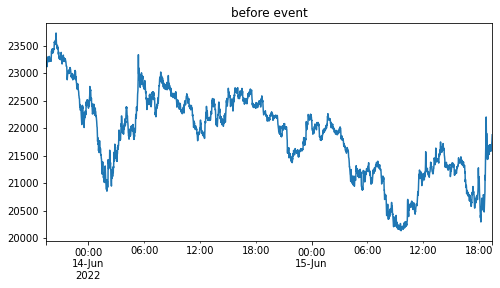

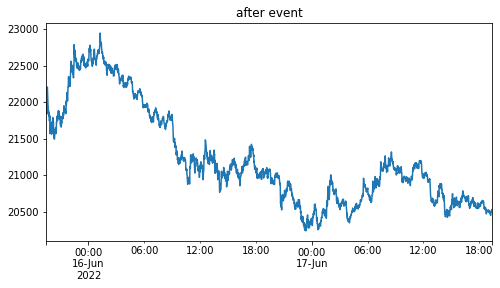

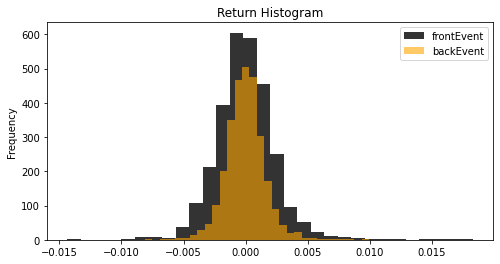

In [12]:
stat = event_stat(df=df, eventTime='2022-6-15 19:25', frontMinute=2880, backMinute=2880, kbar=1, print_=True, plot_=True)

* 每一類型的放進去跑迴圈
* 使用不同長度的length, 畫出 x軸時間 y軸rsi絕對值的夏普值之類，找出最好的rolling天數來做交易
* 經濟數據公布 有效期應該比較短、FED 有效期應該較長
* 美股相關性 太低不做
* Lag 幾期看看

In [13]:
fed_meeting_timelist = ['2022-1-26 19:24', '2022-3-16 19:23', '2022-5-4 19:16', '2022-6-15 19:25', '2022-7-27 19:23', '2022-9-21 19:11']

In [59]:
eco_predict_timelist = ['2021-3-17 17:59', '2021-6-16 17:59', '2021-9-22 17:59', '2021-12-15 18:59']

In [60]:
fed_meeting1 = []
fed_meeting2 = []

for t in eco_predict_timelist:
    # print(t)
    stat = event_stat(df=df, eventTime=t, frontMinute=2880, backMinute=2880, kbar=15, print_=False, plot_=False)
    fed_meeting1.append(stat[0])
    fed_meeting2.append(stat[1])
    # print('\n')

In [61]:
[i[5] for i in fed_meeting1]

[7.2830935917747555, 7.964624826165982, 16.118630670267518, 5.751190969003404]

In [62]:
[i[5] for i in fed_meeting2]

[10.446081823251365,
 12.458089057083114,
 12.354729518571082,
 11.635595534770138]

In [63]:
np.mean([i[5] for i in fed_meeting1])

9.279385014302916

In [64]:
np.mean([i[5] for i in fed_meeting2])

11.723623983418925

## 資料整理

In [158]:
date='2022-01-27'
pd.read_csv(f'tick/BTCUSDT-trades-{date}.zip', header=None)

,0,1,2,3,4,5,6
0,1237606287,36807.24,0.00035,12.882534,1643241600000,True,True
1,1237606288,36808.04,0.00237,87.235055,1643241600000,True,True
2,1237606289,36808.04,0.00055,20.244422,1643241600002,True,True
3,1237606290,36809.34,0.00302,111.164207,1643241600002,False,True
4,1237606291,36808.04,0.00342,125.883497,1643241600002,True,True
...,...,...,...,...,...,...,...
1308403,1238914690,37160.11,0.00323,120.027155,1643327999996,False,True
1308404,1238914691,37160.10,0.00560,208.096560,1643327999998,True,True
1308405,1238914692,37160.10,0.00070,26.012070,1643327999999,True,True
1308406,1238914693,37160.10,0.00247,91.785447,1643327999999,True,True


In [21]:
def to_kline(date='2022-01-25'):
    tick = pd.read_csv(f'tick/BTCUSDT-trades-{date}.zip', header=None)
    tick.columns = ['ID', 'price', 'size', 'size_quote', 'trade_time', 'is_buyer_mm', 'ignore']
    tick['time'] = [dt.datetime.fromtimestamp(i/1000) for i in tick['trade_time']]
    tick = tick[['price', 'size', 'size_quote', 'time', 'is_buyer_mm']]
    tick.index = tick['time']

    tick_sell = tick[tick['is_buyer_mm']==True].drop(['is_buyer_mm', 'time'], axis=1)
    tick_buy = tick[tick['is_buyer_mm']==False].drop(['is_buyer_mm', 'time'], axis=1)

    twap = tick['size_quote'].resample(rule='1T').sum() / tick['size'].resample(rule='1T').sum()
    buy_volume = tick_buy['size'].resample(rule='1T').sum()
    buy_twap = tick_buy['size_quote'].resample(rule='1T').sum() / tick_buy['size'].resample(rule='1T').sum()
    sell_volume = tick_sell['size'].resample(rule='1T').sum()
    sell_twap = tick_sell['size_quote'].resample(rule='1T').sum() / tick_sell['size'].resample(rule='1T').sum()

    kline = pd.concat([twap, buy_volume, buy_twap, sell_volume, sell_twap], axis=1)
    kline.columns = ['twap', 'buy_volume', 'buy_twap', 'sell_volume', 'sell_twap']

    # to utc+0 & 後歸
    kline.index = [i-dt.timedelta(hours=8)+dt.timedelta(minutes=1) for i in kline.index]

    return kline

In [22]:
kline = to_kline(date='2022-01-25')
kline

,twap,buy_volume,buy_twap,sell_volume,sell_twap
2022-01-25 00:01:00,36654.099838,28.25959,36661.089208,27.28544,36646.860932
2022-01-25 00:02:00,36581.685744,25.62796,36579.779902,60.73194,36582.489980
2022-01-25 00:03:00,36542.551673,17.99286,36542.114500,17.60624,36542.998447
2022-01-25 00:04:00,36603.818813,18.29167,36594.339933,30.40242,36609.521799
2022-01-25 00:05:00,36621.549417,14.75791,36621.608531,18.96285,36621.503412
...,...,...,...,...,...
2022-01-25 23:56:00,36898.230841,5.13632,36891.016522,5.85924,36904.555049
2022-01-25 23:57:00,36904.553249,7.81747,36900.941253,10.21499,36907.317487
2022-01-25 23:58:00,36929.728610,3.81175,36933.552806,4.61641,36926.570988
2022-01-25 23:59:00,36932.245726,3.83474,36929.805008,1.96221,36937.015612


In [65]:
# event_time = ['2022-1-26 19:24', '2022-3-16 19:23', '2022-5-4 19:16', '2022-6-15 19:25', '2022-7-27 19:23', '2022-9-21 19:11']
eco_predict_timelist = ['2021-3-17 17:59', '2021-6-16 17:59', '2021-9-22 17:59', '2021-12-15 18:59']

for t in eco_predict_timelist:
    df_event = df.loc[t:].iloc[:1440*5]
    dates = sorted(list(set(df_event.index.date.astype(str))))
    s = t.split(' ')[0].replace('-','_')

    tick_df = pd.DataFrame()
    for date in dates:
        kline = to_kline(date=date)
        tick_df = pd.concat([tick_df, kline])

    globals()[f'event_{s}'] = pd.concat([df_event, tick_df], axis=1).dropna()

In [66]:
event_2021_3_17.to_csv('event/event_2021_3_17.csv')
event_2021_6_16.to_csv('event/event_2021_6_16.csv')
event_2021_9_22.to_csv('event/event_2021_9_22.csv')
event_2021_12_15.to_csv('event/event_2021_12_15.csv')

In [42]:
event_2022_1_26 = pd.read_csv('event/event_2022_1_26.csv', parse_dates=True, index_col='Unnamed: 0')
event_2022_3_16 = pd.read_csv('event/event_2022_3_16.csv', parse_dates=True, index_col='Unnamed: 0')
event_2022_5_4 = pd.read_csv('event/event_2022_5_4.csv', parse_dates=True, index_col='Unnamed: 0')
event_2022_6_15 = pd.read_csv('event/event_2022_6_15.csv', parse_dates=True, index_col='Unnamed: 0')
event_2022_7_27 = pd.read_csv('event/event_2022_7_27.csv', parse_dates=True, index_col='Unnamed: 0')
event_2022_9_21 = pd.read_csv('event/event_2022_9_21.csv', parse_dates=True, index_col='Unnamed: 0')

In [96]:
event_2022_7_27.tail(3)

,Open,High,Low,Close,Volume,twap,buy_volume,buy_twap,sell_volume,sell_twap,buy_sell_ratio,cum_Volume,cum_buy_volume,cum_sell_volume,cum_buy_sell_ratio,MA,STD,upLine,downLine
2022-08-01 19:20:00,22997.74,22997.81,22967.59,22982.64,71.37200,22981.783744,31.93878,22982.589610,39.43322,22981.131035,-0.190054,878950.12516,439757.52174,439192.60342,0.001286,22971.515170,27.431227,23012.662010,22930.368329
2022-08-01 19:21:00,22982.64,22987.32,22968.71,22985.25,64.09125,22978.885924,30.98564,22979.700442,33.10561,22978.123566,-0.064037,879014.21641,439788.50738,439225.70903,0.001281,22975.115924,24.229728,23011.460516,22938.771332
2022-08-01 19:22:00,22985.25,22999.46,22967.65,22976.87,84.27095,22982.665933,37.47622,22982.858699,46.79473,22982.511553,-0.199136,879098.48736,439825.98360,439272.50376,0.001260,22978.538697,21.014766,23010.060846,22947.016548


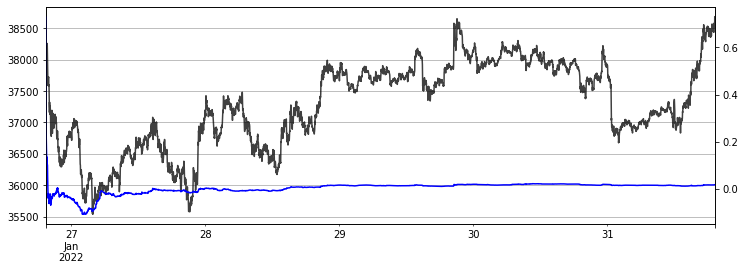

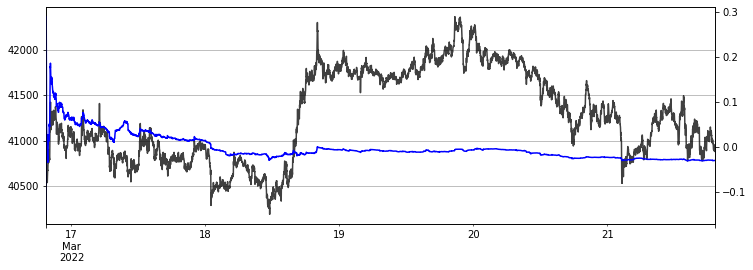

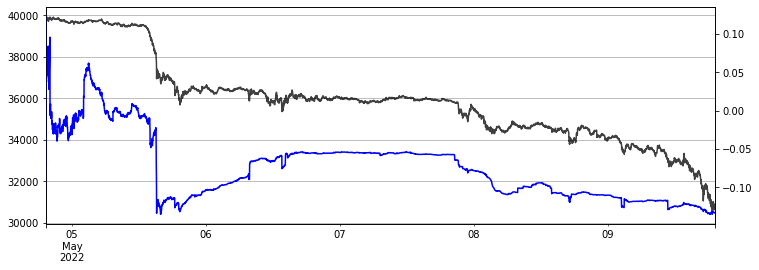

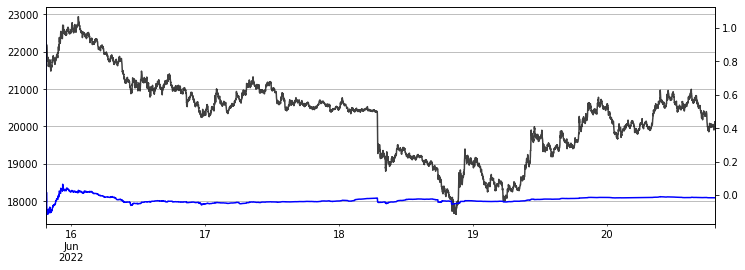

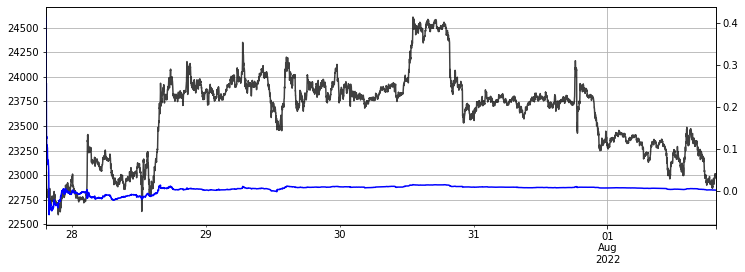

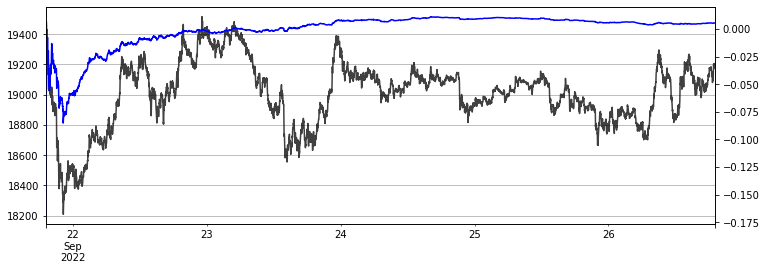

In [45]:
events = [event_2022_1_26, event_2022_3_16, event_2022_5_4, event_2022_6_15, event_2022_7_27, event_2022_9_21]

for event in events:

    event['buy_sell_ratio'] = event['buy_volume'] / event['sell_volume'] - 1
    event['cum_Volume'] = event['Volume'].cumsum()
    event['cum_buy_volume'] = event['buy_volume'].cumsum()
    event['cum_sell_volume'] = event['sell_volume'].cumsum()
    event['cum_buy_sell_ratio'] = event['cum_buy_volume'] / event['cum_sell_volume'] - 1
    
    event['twap'].plot(figsize=(12,4),c='black', alpha=0.75)
    event['cum_buy_sell_ratio'].plot(figsize=(12,4), c='blue' , secondary_y=True, grid=True)
    plt.show();

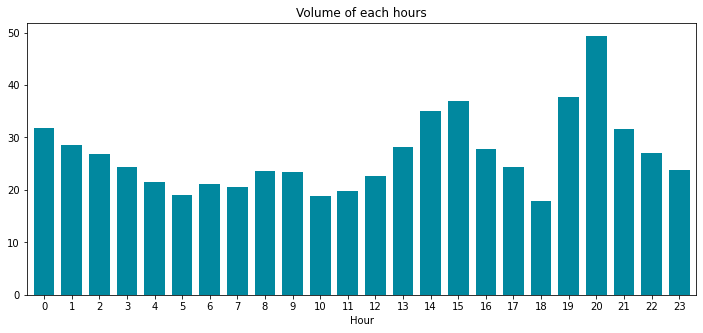

In [47]:
plt.figure(figsize = (12,5))
event_2022_1_26['Hour'] = event_2022_1_26.index.map(lambda x: x.hour)
event_2022_1_26.groupby(['Hour'])['Volume'].mean().plot(kind='bar', width=0.75, color='#01889f')
plt.xticks(rotation = 0)
plt.title('Volume of each hours');

## Backtesting

In [48]:
fund = 10000
money = 10000
feeRate = 0
event = event_2022_7_27

# 參數
length = 15
NumStd = 1.5
K_profit = 0.06
K_loss = 0.03

event['MA'] = event['twap'].rolling(window=length, center=False).mean()
event['STD'] = event['twap'].rolling(window=length, center=False).std()
event['upLine'] = event['MA'] + NumStd*event['STD']
event['downLine'] = event['MA'] - NumStd*event['STD']

event.tail(3)

,Open,High,Low,Close,Volume,twap,buy_volume,buy_twap,sell_volume,sell_twap,buy_sell_ratio,cum_Volume,cum_buy_volume,cum_sell_volume,cum_buy_sell_ratio,MA,STD,upLine,downLine
2022-08-01 19:20:00,22997.74,22997.81,22967.59,22982.64,71.37200,22981.783744,31.93878,22982.589610,39.43322,22981.131035,-0.190054,878950.12516,439757.52174,439192.60342,0.001286,22971.515170,27.431227,23012.662010,22930.368329
2022-08-01 19:21:00,22982.64,22987.32,22968.71,22985.25,64.09125,22978.885924,30.98564,22979.700442,33.10561,22978.123566,-0.064037,879014.21641,439788.50738,439225.70903,0.001281,22975.115924,24.229728,23011.460516,22938.771332
2022-08-01 19:22:00,22985.25,22999.46,22967.65,22976.87,84.27095,22982.665933,37.47622,22982.858699,46.79473,22982.511553,-0.199136,879098.48736,439825.98360,439272.50376,0.001260,22978.538697,21.014766,23010.060846,22947.016548


In [49]:
for i,j in zip(event.columns, range(len(event.columns))):
    print(j,i)

0 Open
1 High
2 Low
3 Close
4 Volume
5 twap
6 buy_volume
7 buy_twap
8 sell_volume
9 sell_twap
10 buy_sell_ratio
11 cum_Volume
12 cum_buy_volume
13 cum_sell_volume
14 cum_buy_sell_ratio
15 MA
16 STD
17 upLine
18 downLine


In [50]:
def backtest(event=event_2022_7_27, event_name='event_2022_7_27', _print=False, _plot=False, length=15, NumStd=1.5, K_profit=0.06, K_loss=0.03):

    fund = 10000
    money = 10000
    feeRate = 0
    # event = event_2022_7_27

    # 參數
    # length = 15
    # NumStd = 1.5
    # K_profit = 0.06
    # K_loss = 0.03

    event['MA'] = event['twap'].rolling(window=length, center=False).mean()
    event['STD'] = event['twap'].rolling(window=length, center=False).std()
    event['upLine'] = event['MA'] + NumStd*event['STD']
    event['downLine'] = event['MA'] - NumStd*event['STD']

    BS = None
    buy = []
    sell = []
    sellshort = []
    buytocover = []
    profit_list = [0]
    profit_fee_list = [0]
    profit_fee_list_realized = []
    high = -10**8
    low = 10**8

    df_arr = np.array(event)
    time_arr = np.array(event.index)

    for i in range(len(df_arr)):

        if i == len(df_arr)-1:
            break
            
        ## 進場邏輯
        entryLong = df_arr[i,5] > df_arr[i,17]
        entrySellShort = df_arr[i,5] < df_arr[i,18]
        entryCondition = True
        
        ## 出場邏輯
        exitShort = df_arr[i,5] <= df_arr[i,15]
        exitBuyToCover = df_arr[i,5] >= df_arr[i,15]

        ## 停利停損邏輯
        if BS == 'B':
            stopProfit = df_arr[i,9] >= df_arr[t,7] * (1+K_profit)
            stopLossMoving = df_arr[i,9] <= high * (1-K_loss)
            # stopLoss = df_arr[i,9] <= df_arr[t,7] * (1-K_loss)
            
        elif BS == 'S':
            stopProfit = df_arr[i,7] <= df_arr[t,9] * (1-K_profit)
            stopLossMoving = df_arr[i,7] >= low * (1+K_loss)
            # stopLoss = df_arr[i,7] >= df_arr[t,9] * (1+K_loss)
            
        if BS == None:
            profit_list.append(0)
            profit_fee_list.append(0)
            
            if entryLong and entryCondition:
                tempSize = money / df_arr[i+1,7]
                BS = 'B'
                t = i+1
                buy.append(t)
                t1 = time_arr[i+1]
                high = df_arr[i,0]

            elif entrySellShort and entryCondition:
                tempSize = money / df_arr[i+1,9]
                BS = 'S'
                t = i+1
                sellshort.append(t)
                t1 = time_arr[i+1]
                low = df_arr[i,0]
                
        elif BS == 'B':
            profit = tempSize * (df_arr[i+1,0] - df_arr[i,0])
            profit_list.append(profit)
            t2 = time_arr[i+1]
            
            if df_arr[i,0] > high:
                high = df_arr[i,0]

            if exitShort or i == len(df_arr)-2 or stopLossMoving or stopProfit:
            # A = False
            # if A:
                pl_round = tempSize * (df_arr[i+1,9] - df_arr[t,7])
                profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
                profit_fee_list.append(profit_fee)
                sell.append(i+1)
                BS=None
                high = -10**8

                # Realized PnL
                profit_fee_realized = pl_round - money*feeRate - (money+pl_round)*feeRate
                profit_fee_list_realized.append(profit_fee_realized)
                
            else:
                profit_fee = profit
                profit_fee_list.append(profit_fee)
                t1 = time_arr[i+1]
                
        elif BS == 'S':
            profit = tempSize * (df_arr[i,0] - df_arr[i+1,0])
            profit_list.append(profit)
            t2 = time_arr[i+1]

            if df_arr[i,0] < low:
                low = df_arr[i,0]
            
            if exitBuyToCover or i == len(df_arr)-2 or stopLossMoving or stopProfit:
            # A = False
            # if A:
                pl_round = tempSize * (df_arr[t,9] - df_arr[i+1,7])
                profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
                profit_fee_list.append(profit_fee)
                buytocover.append(i+1)
                BS=None
                low = 10**8

                # Realized PnL
                profit_fee_realized = pl_round - money*feeRate - (money+pl_round)*feeRate
                profit_fee_list_realized.append(profit_fee_realized)
    
            else:
                profit_fee = profit
                profit_fee_list.append(profit_fee)
                t1 = time_arr[i+1]            
                
    equity = pd.DataFrame({'profit':np.cumsum(profit_fee_list)}, index=event.index)
    equity['equity'] = equity['profit'] + fund
    equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
    equity['drawdown'] = equity['equity'] - equity['equity'].cummax()
    
    if _print == True: 
        ret = equity['equity'][-1]/equity['equity'][0] - 1
        mdd = abs(equity['drawdown_percent'].min())
        if mdd != 0:
            calmarRatio = ret / mdd
        else:
            calmarRatio = np.nan
        tradeTimes = len(buy)+len(sellshort)

        if len(profit_fee_list_realized) != 0:
            winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
        else:
            winRate = np.nan

        if abs(np.mean([i for i in profit_fee_list_realized if i < 0])) != 0:
            winLossRatio = np.mean([i for i in profit_fee_list_realized if i > 0]) / abs(np.mean([i for i in profit_fee_list_realized if i < 0]))
        else:
            winLossRatio = np.nan

        print(f'<{event_name}>')
        print(f'return: {np.round(ret,4)*100}%')
        print(f'mdd: {np.round(mdd,4)*100}%')
        print(f'calmarRatio: {np.round(calmarRatio,2)}')
        print(f'tradeTimes: {tradeTimes}')
        print(f'winRate: {np.round(winRate,4)*100}%')
        print(f'winLossRatio: {np.round(winLossRatio,2)}')
        print()

    if _plot == True:
        equity.plot(figsize=(12,6), ylabel='PnL')
        event['Close'].plot(alpha=0.7, grid=True, secondary_y=True)
        plt.title(f'Equity Curve {event_name}')
        plt.ylabel('BTC Spot Price')
        plt.show();

    return equity

In [51]:
events = [event_2022_1_26, event_2022_3_16, event_2022_5_4, event_2022_6_15, event_2022_7_27, event_2022_9_21]

In [52]:
result = backtest(event=event_2022_1_26, event_name='event_2022_1_26', _print=True, _plot=False, length=15, NumStd=2, K_profit=0.02, K_loss=0.1)

<event_2022_1_26>
return: 1.97%
mdd: 7.199999999999999%
calmarRatio: 0.27
tradeTimes: 1
winRate: 100.0%
winLossRatio: nan



寫一個 for loop, 隨機參數、隨機指標 (先寫出 5~10 種)，找出至少三種在六次事件中都滿足要求的結果：
- calmarRatio > 4
- tradeTimes > 5
- 先這樣

> 前提：先寫出**至少10種**交易邏輯

In [69]:
events = [event_2021_3_17, event_2021_6_16, event_2021_9_22, event_2021_12_15, 
          event_2022_1_26, event_2022_3_16, event_2022_5_4, event_2022_6_15, event_2022_7_27, event_2022_9_21]

events_name = ['event_2021_3_17', 'event_2021_6_16', 'event_2021_9_22', 'event_2021_12_15', 
          'event_2022_1_26', 'event_2022_3_16', 'event_2022_5_4', 'event_2022_6_15', 'event_2022_7_27', 'event_2022_9_21']

In [92]:
event_2022_1_26

,Open,High,Low,Close,Volume,twap,buy_volume,buy_twap,sell_volume,sell_twap,buy_sell_ratio,cum_Volume,cum_buy_volume,cum_sell_volume,cum_buy_sell_ratio,Hour,MA,STD,upLine,downLine
2022-01-31 19:23:00,38654.71,38665.39,38627.01,38631.15,22.80134,38641.561219,9.09217,38642.354246,13.70917,38641.035269,-0.336782,192535.27387,97143.50826,95391.76561,0.018364,19,38606.858779,52.681723,38712.222226,38501.495333


In [ ]:
event_2022_1_26

<event_2021_3_17>


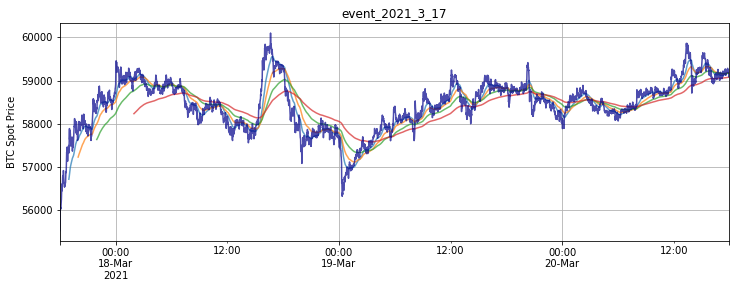

<event_2021_6_16>


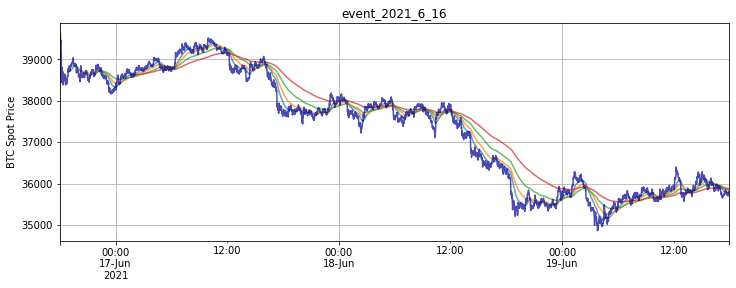

<event_2021_9_22>


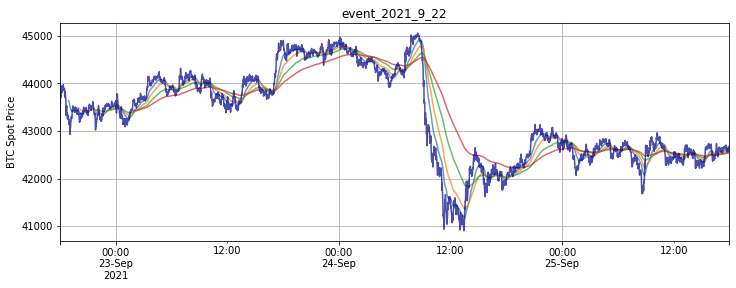

<event_2021_12_15>


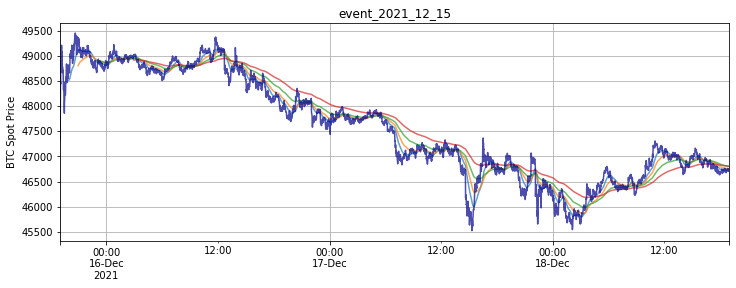

<event_2022_1_26>


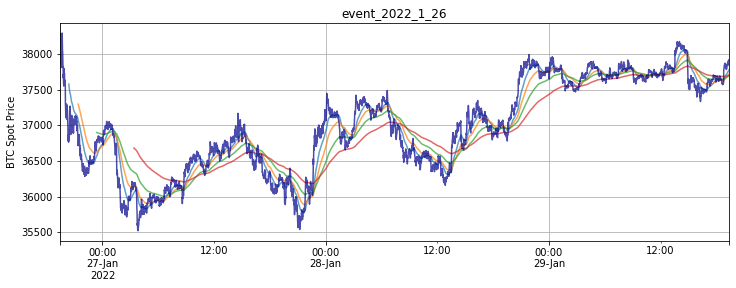

<event_2022_3_16>


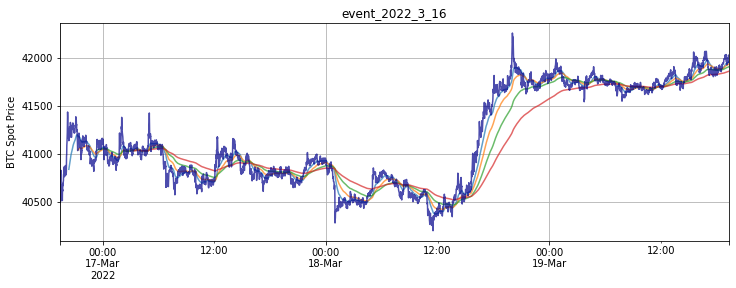

<event_2022_5_4>


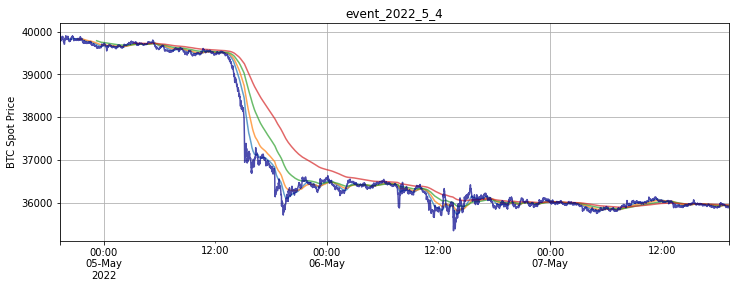

<event_2022_6_15>


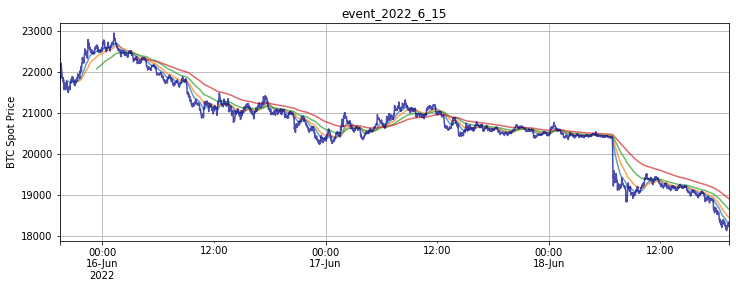

<event_2022_7_27>


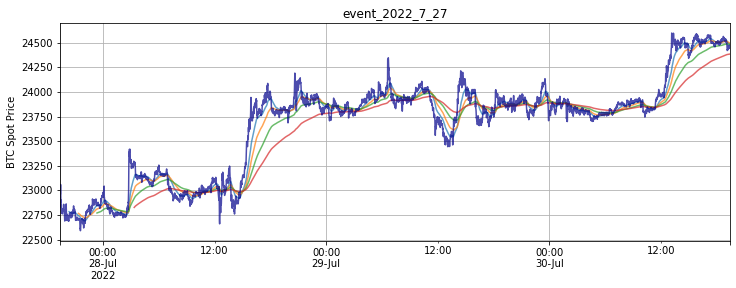

<event_2022_9_21>


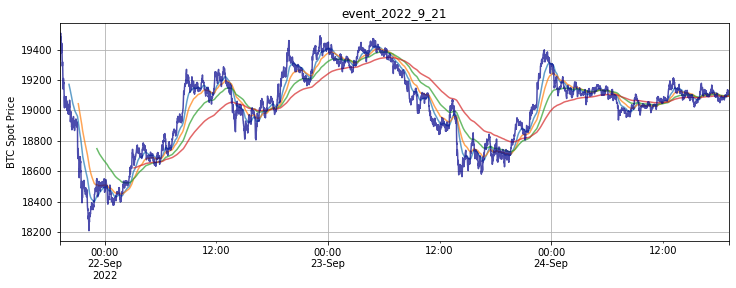

In [91]:
length1 = 30
length2 = 60
length3 = 120
length4 = 240
length5 = 480
look_time = 1440*3

for i,j in zip(events, events_name):
    print(f'<{j}>')
    # MA = i['Close'].rolling(length1).mean().iloc[:look_time]
    talib.EMA(i['Close'], length1).iloc[:look_time].plot(alpha=0.7)
    talib.EMA(i['Close'], length2).iloc[:look_time].plot(alpha=0.7)
    talib.EMA(i['Close'], length3).iloc[:look_time].plot(alpha=0.7)
    talib.EMA(i['Close'], length4).iloc[:look_time].plot(alpha=0.7)
    talib.EMA(i['Close'], length5).iloc[:look_time].plot(alpha=0.7)
    i['Close'].iloc[:look_time].plot(grid=True, figsize=(12,4), c='darkblue', alpha=0.7)
    # MA.plot(alpha=0.7, grid=True, figsize=(12,4))
    plt.title(f'{j}')
    plt.ylabel('BTC Spot Price')
    plt.show();

In [106]:
events[0].tail(1)

,Open,High,Low,Close,Volume,twap,buy_volume,buy_twap,sell_volume,sell_twap
2021-03-22 17:58:00,57168.39,57190.0,57103.0,57106.56,24.16599,57140.043614,13.36724,57140.344884,10.79875,57139.670686


In [122]:
ex1 = (event_2022_7_27['buy_twap'] / event_2022_7_27['sell_twap'] - 1) * 100
ex2 = (event_2022_7_27['buy_volume'].rolling(length1).sum() / event_2022_7_27['sell_volume'].rolling(length1).sum() - 1) * 100

<AxesSubplot:>

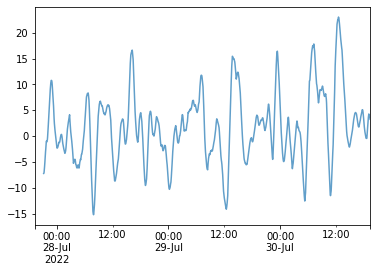

In [141]:
buy_sell_ratio = (event_2022_7_27['buy_volume'] / event_2022_7_27['sell_volume'] - 1) * 100
talib.SMA(ex2, 50).iloc[:look_time].plot(alpha=0.7)
# talib.SMA(ex2, 150).iloc[:look_time].plot(alpha=0.7)

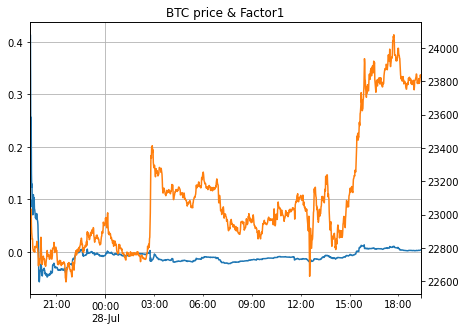

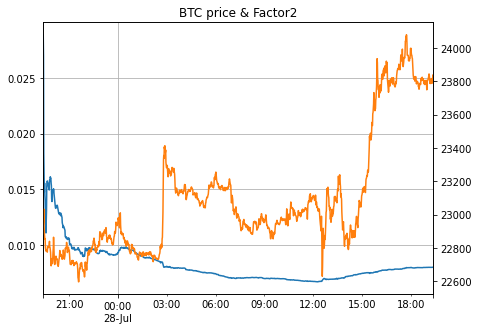

In [205]:
event = event_2022_7_27

event.iloc[:1440]['cum_buy_sell_ratio'].plot(grid=True, title='Factor1 & BTC price')
event.iloc[:1440]['twap'].plot(grid=True, secondary_y=True, figsize=(7,5))
plt.show()

event.iloc[:1440]['cum_buy_sell_twap_ratio'].plot(grid=True, title='Factor2 & BTC price')
event.iloc[:1440]['twap'].plot(grid=True, secondary_y=True, figsize=(7,5))
plt.show()

<AxesSubplot:>

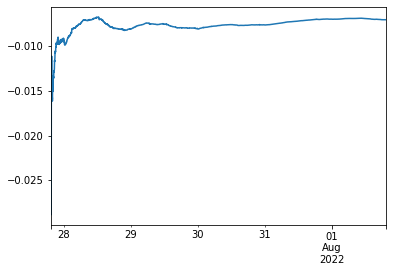

In [193]:
buy_sell_diff = (event_2022_7_27['sell_twap'] / event_2022_7_27['buy_twap'] - 1) * 100
cc = buy_sell_diff.cumsum() / [k+1 for k in range(len(buy_sell_diff))]
cc.plot()

In [ ]:
event_2022_5_4

In [190]:
event = event_2022_5_4

event['buy_sell_ratio'] = event['buy_volume'] / event['sell_volume'] - 1
event['cum_Volume'] = event['Volume'].cumsum()
event['cum_buy_volume'] = event['buy_volume'].cumsum()
event['cum_sell_volume'] = event['sell_volume'].cumsum()
event['cum_buy_sell_ratio'] = event['cum_buy_volume'] / event['cum_sell_volume'] - 1
event['buy_sell_twap_ratio'] = (event['buy_twap'] / event['sell_twap'] - 1) * 100
event['cum_buy_sell_twap_ratio'] = event['buy_sell_twap_ratio'].cumsum() / [k+1 for k in range(len(event['buy_sell_twap_ratio']))]


<AxesSubplot:>

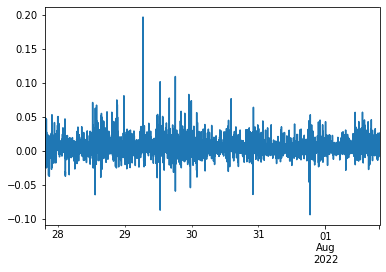

In [207]:
event['buy_sell_twap_ratio'].plot()

In [191]:
event.tail(1)

,Open,High,Low,Close,Volume,twap,buy_volume,buy_twap,sell_volume,sell_twap,buy_sell_ratio,cum_Volume,cum_buy_volume,cum_sell_volume,cum_buy_sell_ratio,buy_sell_twap_ratio,cum_buy_sell_twap_ratio
2022-05-09 19:15:00,30863.97,30880.33,30813.88,30879.43,121.95187,30842.543369,66.66316,30839.377709,55.28871,30846.360295,0.205728,418157.20709,194172.076978,223985.130112,-0.133103,-0.022637,-0.008706


<AxesSubplot:>

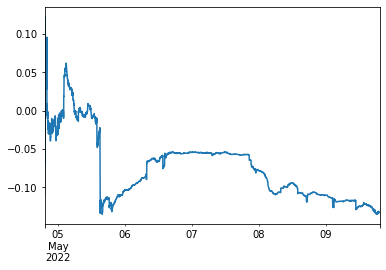

In [192]:
event['cum_buy_sell_ratio'].plot()

<AxesSubplot:>

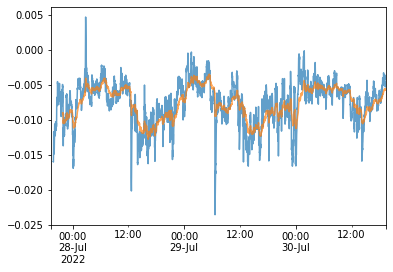

In [133]:
event = (event_2022_7_27['sell_twap'] / event_2022_7_27['buy_twap'] - 1) * 100
talib.EMA(buy_sell_diff, 30).iloc[:look_time].plot(alpha=0.7)
talib.EMA(buy_sell_diff, 150).iloc[:look_time].plot(alpha=0.7)
# buy_sell_diff.plot()

In [ ]:
buy_sell_diff = (event_2022_7_27['sell_twap'] / event_2022_7_27['buy_twap'] - 1) * 100
talib.EMA(buy_sell_diff, length2).iloc[:look_time].plot(alpha=0.7)
# buy_sell_diff.plot()

In [126]:
events[0].columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'twap', 'buy_volume',
       'buy_twap', 'sell_volume', 'sell_twap'],
      dtype='object')

<event_2021_3_17>


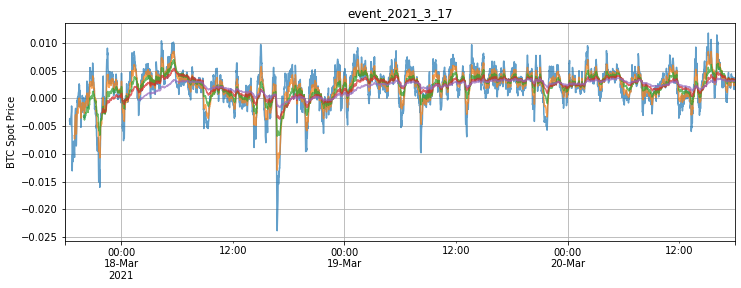

<event_2021_6_16>


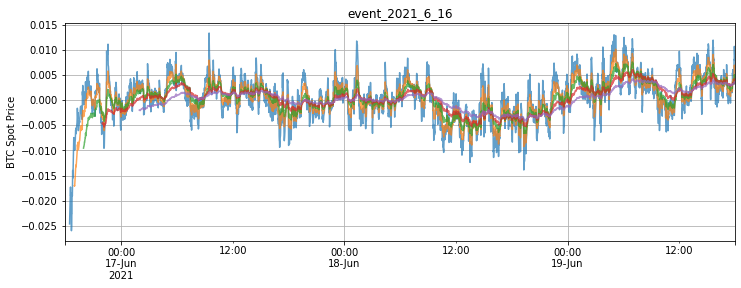

<event_2021_9_22>


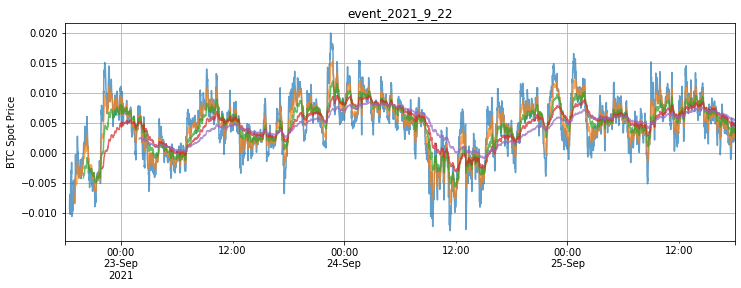

<event_2021_12_15>


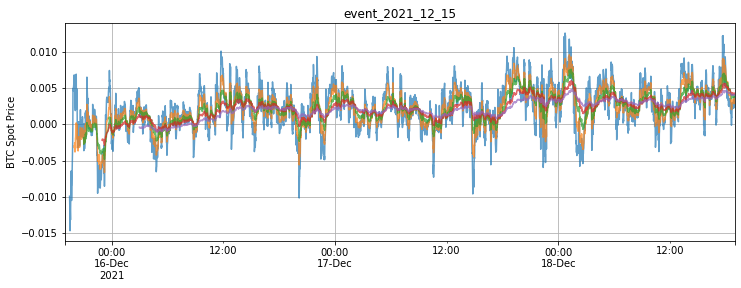

<event_2022_1_26>


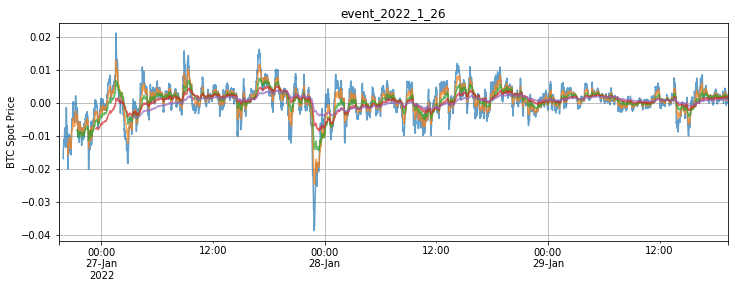

<event_2022_3_16>


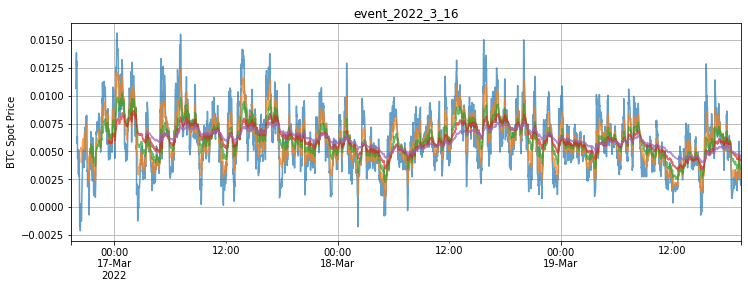

<event_2022_5_4>


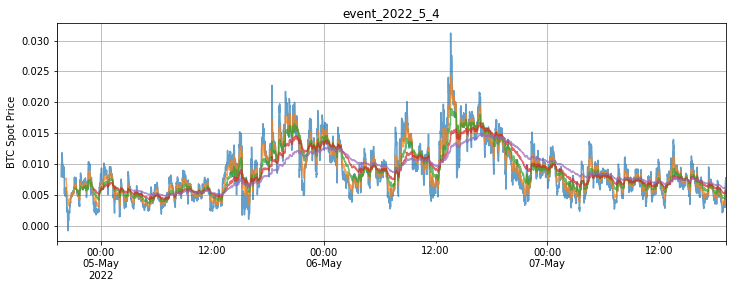

<event_2022_6_15>


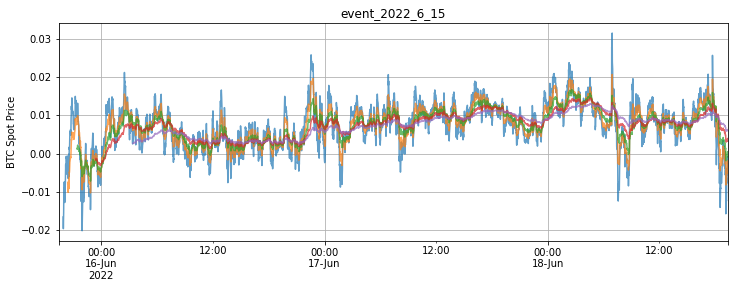

<event_2022_7_27>


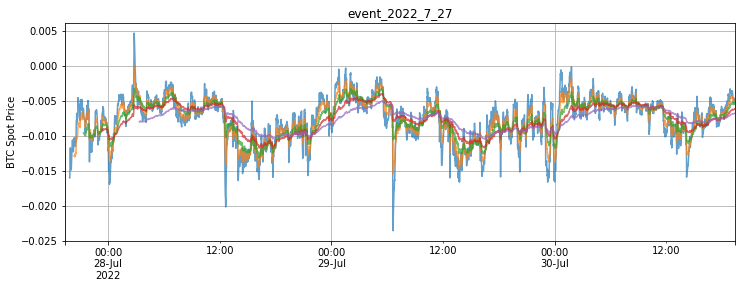

<event_2022_9_21>


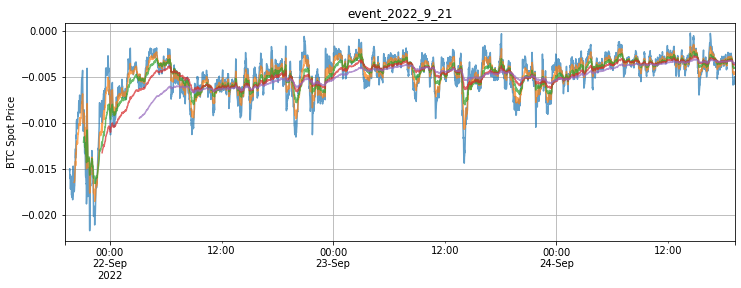

In [137]:
length1 = 30
length2 = 60
length3 = 120
length4 = 240
length5 = 480
look_time = 1440*3

for i,j in zip(events, events_name):
    print(f'<{j}>')
    # MA = i['Close'].rolling(length1).mean().iloc[:look_time]
    # buy_sell_ratio = (i['buy_volume'] / i['sell_volume'] - 1) * 100
    buy_sell_diff = (i['sell_twap'] / i['buy_twap'] - 1) * 100

    talib.EMA(buy_sell_diff, length1).iloc[:look_time].plot(alpha=0.7)
    talib.EMA(buy_sell_diff, length2).iloc[:look_time].plot(alpha=0.7)
    talib.EMA(buy_sell_diff, length3).iloc[:look_time].plot(alpha=0.7)
    talib.EMA(buy_sell_diff, length4).iloc[:look_time].plot(alpha=0.7)
    talib.EMA(buy_sell_diff, length5).iloc[:look_time].plot(alpha=0.7, grid=True, figsize=(12,4))
    # i['Close'].iloc[:look_time].plot(grid=True, figsize=(12,4), c='darkblue', alpha=0.7)
    # MA.plot(alpha=0.7, grid=True, figsize=(12,4))
    plt.title(f'{j}')
    plt.ylabel('BTC Spot Price')
    plt.show();

In [166]:
events_name = ['event_2021_3_17.csv', 'event_2021_6_16.csv', 'event_2021_9_22.csv', 'event_2021_12_15.csv', 
               'event_2022_1_26.csv', 'event_2022_3_16.csv', 'event_2022_5_4.csv', 'event_2022_6_15.csv', 'event_2022_7_27.csv', 'event_2022_9_21.csv']

,profit,equity,drawdown_percent,drawdown
2022-09-21 19:11:00,0.000000,10000.000000,0.000000,0.000000
2022-09-21 19:12:00,0.000000,10000.000000,0.000000,0.000000
2022-09-21 19:13:00,0.000000,10000.000000,0.000000,0.000000
2022-09-21 19:14:00,0.000000,10000.000000,0.000000,0.000000
2022-09-21 19:15:00,0.000000,10000.000000,0.000000,0.000000
...,...,...,...,...
2022-09-23 08:44:00,-157.587109,9842.412891,-0.017029,-170.514618
2022-09-23 08:45:00,-171.362745,9828.637255,-0.018405,-184.290255
2022-09-23 08:46:00,-178.774860,9821.225140,-0.019145,-191.702369
2022-09-23 08:47:00,-190.006115,9809.993885,-0.020267,-202.933625


event_2021_3_17.csv
ret: 0.02416852184938345
mdd: 0.0090203626029787
calmarRatio: 2.679329303392142


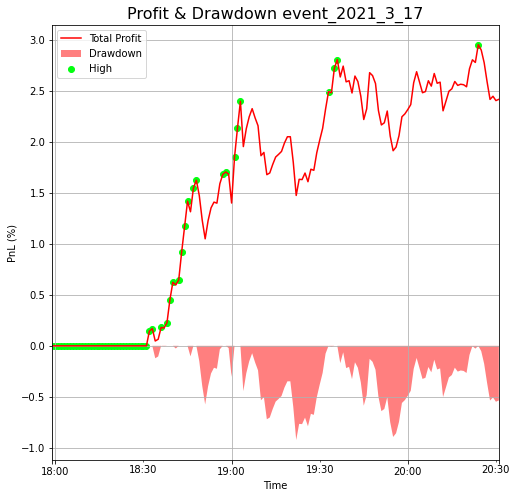

event_2021_6_16.csv
ret: 0.01705390753249758
mdd: 0.0041595381539529
calmarRatio: 4.099952182501531


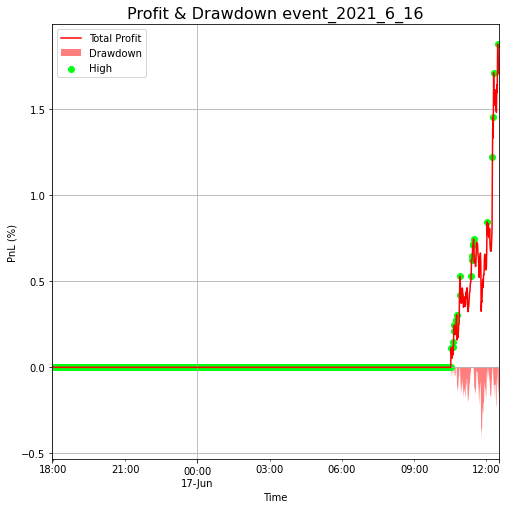

event_2021_9_22.csv
ret: -0.022040735430419733
mdd: 0.0220407354304197
calmarRatio: -1.0000000000000016


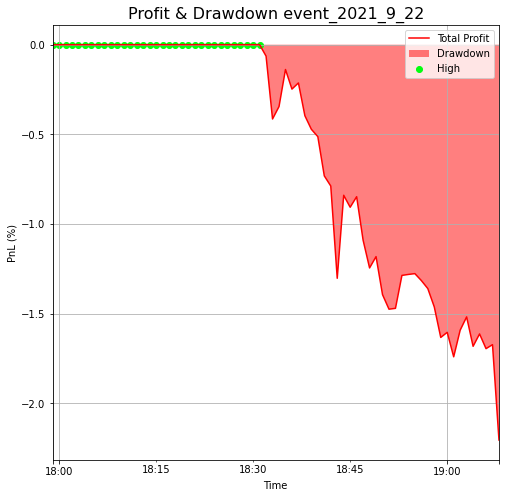

event_2021_12_15.csv
ret: 0.02169306535290505
mdd: 0.0100550758381379
calmarRatio: 2.1574243399165045


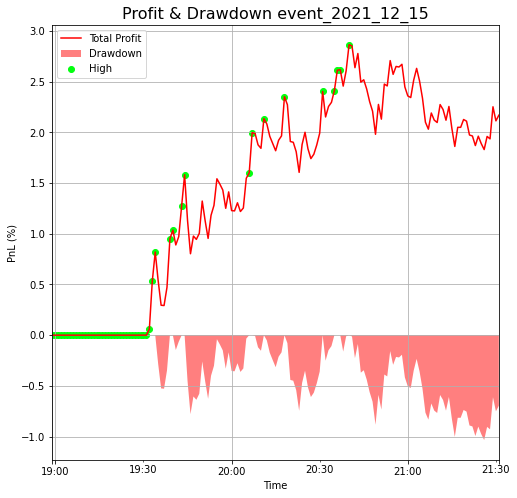

event_2022_1_26.csv
ret: -0.021483006994283627
mdd: 0.0214830069942836
calmarRatio: -1.0000000000000013


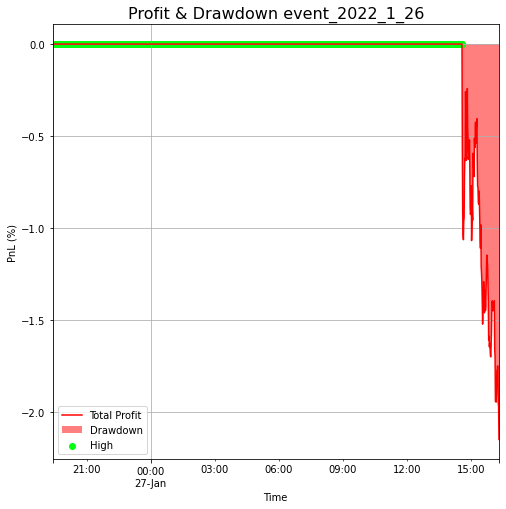

event_2022_3_16.csv
ret: -0.017436566164967915
mdd: 0.0200412236999281
calmarRatio: -0.8700350051494347


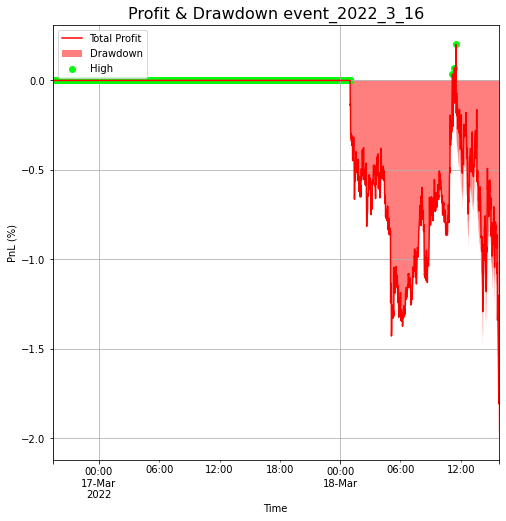

event_2022_5_4.csv
ret: 0.08324021697583994
mdd: 0.0155112695261194
calmarRatio: 5.366434825703459


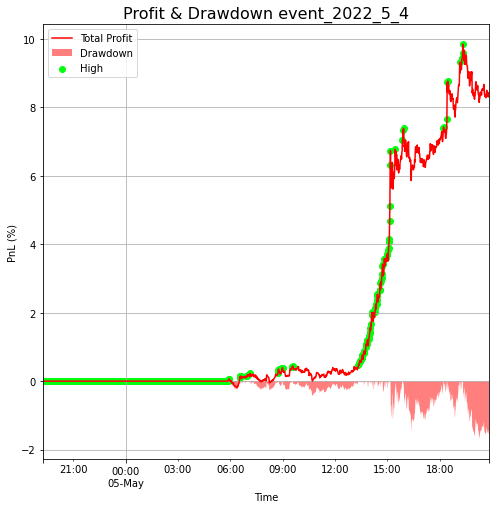

event_2022_6_15.csv
ret: 0.040422112243103214
mdd: 0.0172065487767399
calmarRatio: 2.349228352971428


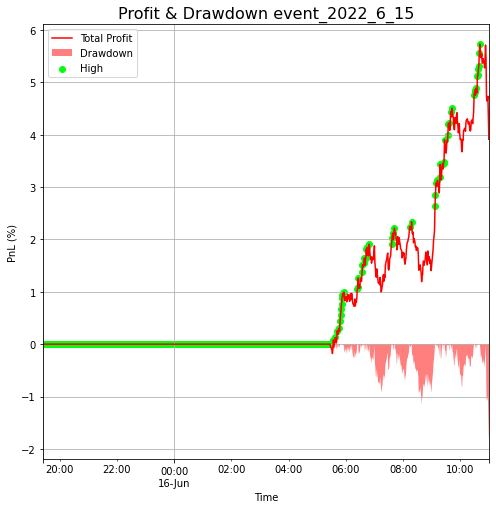

event_2022_7_27.csv
ret: 0.02867460163493396
mdd: 0.0199605746405222
calmarRatio: 1.4365619302723536


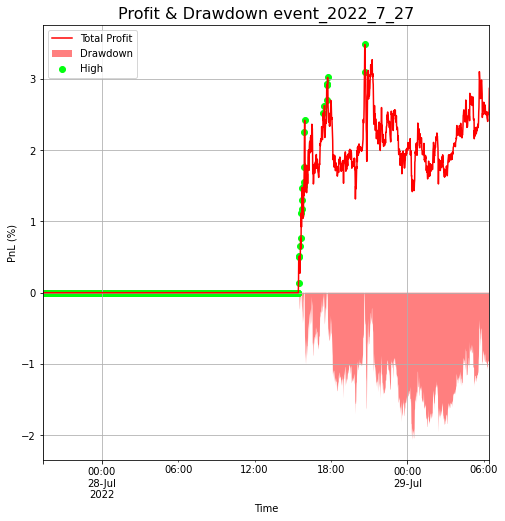

event_2022_9_21.csv
ret: -0.018984677043114018
mdd: 0.0202671620826996
calmarRatio: -0.9367210350244185


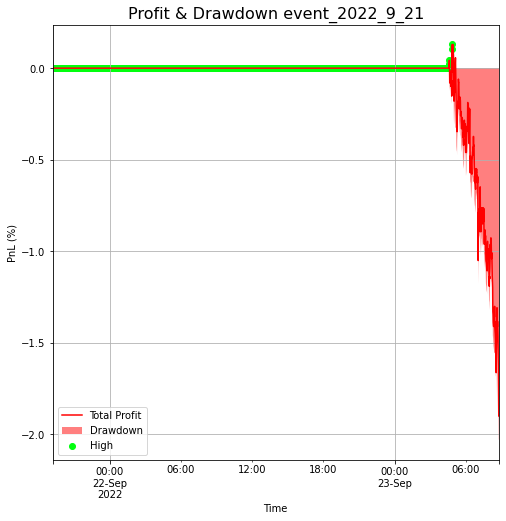

In [184]:
for i in events_name:
    df = pd.read_csv(f'final_event_result/{i}', index_col='Unnamed: 0', parse_dates=True)
    df['profit'] = df['profit'] / 100
    df['equity'] = df['equity'] / 100
    df['drawdown'] = df['drawdown'] / 100

    ret = df['equity'][-1]/df['equity'][0] - 1
    mdd = abs(df['drawdown_percent'].min())
    calmarRatio = ret / mdd

    print(i)
    print(f'ret: {ret}')
    print(f'mdd: {mdd}')
    print(f'calmarRatio: {calmarRatio}')
    
    fig, ax = plt.subplots(figsize = (8,8))

    high_index = df[df['profit'].cummax() == df['profit']].index
    df['profit'].plot(label = 'Total Profit', ax = ax, c = 'r', grid=True)
    plt.fill_between(df['drawdown'].index, df['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
    plt.scatter(high_index, df['profit'].loc[high_index],c = '#02ff0f', label = 'High')

    plt.legend()
    plt.ylabel('PnL (%)')
    plt.xlabel('Time')
    plt.title(f'Profit & Drawdown {i.split(".")[0]}',fontsize  = 16)
    plt.show()

In [173]:
df

,profit,equity,drawdown_percent,drawdown
2022-09-21 19:11:00,0.000000,10000.000000,0.000000,0.000000
2022-09-21 19:12:00,0.000000,10000.000000,0.000000,0.000000
2022-09-21 19:13:00,0.000000,10000.000000,0.000000,0.000000
2022-09-21 19:14:00,0.000000,10000.000000,0.000000,0.000000
2022-09-21 19:15:00,0.000000,10000.000000,0.000000,0.000000
...,...,...,...,...
2022-09-23 08:44:00,-157.587109,9842.412891,-0.017029,-170.514618
2022-09-23 08:45:00,-171.362745,9828.637255,-0.018405,-184.290255
2022-09-23 08:46:00,-178.774860,9821.225140,-0.019145,-191.702369
2022-09-23 08:47:00,-190.006115,9809.993885,-0.020267,-202.933625
